In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pandas as pd

<Axes: >

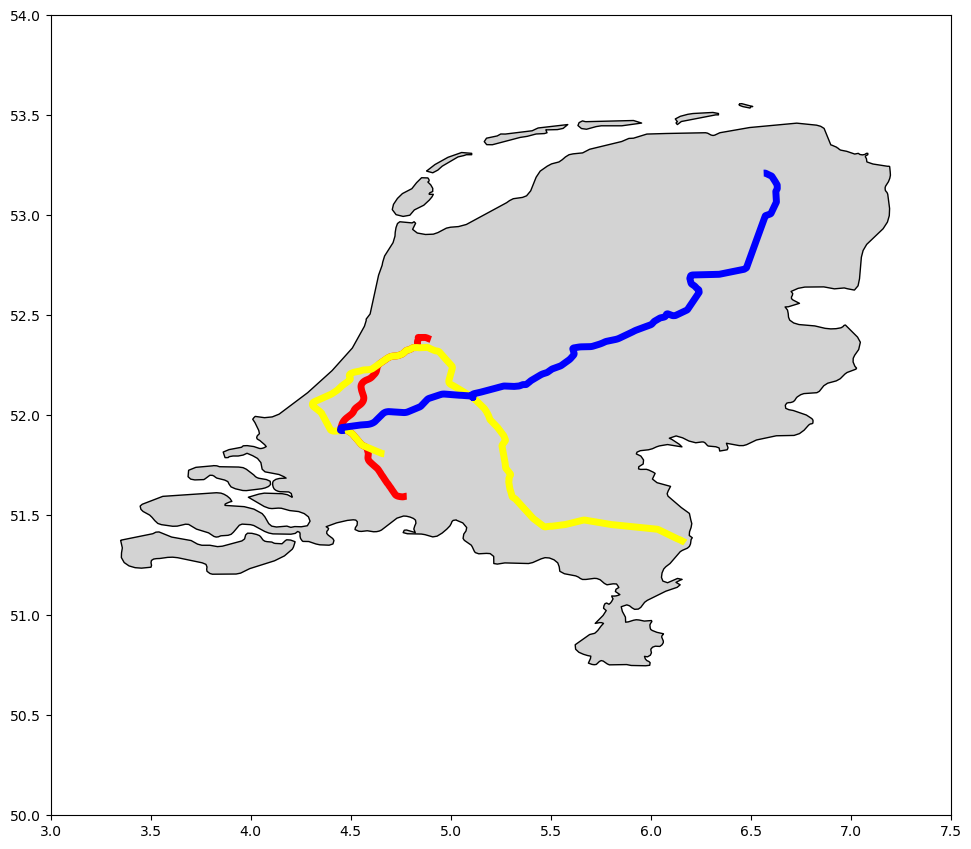

In [32]:
netherlands_shapefile_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
world = gpd.read_file(netherlands_shapefile_path)
netherlands = world[world['NAME'] == "Netherlands"]
fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim([3,7.5])
ax.set_ylim([50,54])
netherlands.plot(ax=ax,  color='lightgray', edgecolor='black')

# API details
a = 'Asd,Ass,Asdl,Shl,Hfd,Rtd,Rtb,Rtz,Rtst,Rlb,Bdpb,Bd'
url = f"https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations={a}"
headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': '12bcfcb686b24cd5ae7af9d4e7887e2f',
}
response = requests.get(url, headers=headers)
geojson_data = response.json()
gdf_railways = gpd.GeoDataFrame.from_features(geojson_data["features"])
gdf_railways.plot(ax=ax, color='red', linewidth=5)

b = 'Ddr,Zwd,Brd,Rlb,Rtst,Rtz,Rtb,Rtd,Sdm,Dtcp,Dt,Rsw,Gvmw,Gv,Laa,Gvm,Vst,Dvnk,Ledn,Ssh,Nvp,Hfd,Shl,Asdz,Rai,Asb,Ac,Bkl,Mas,Utz,Ut,Utvr,Utl,Htn,Htnc,Cl,Gdm,Zbm,Ht,Vg,Btl,Bet,Ehs,Ehv,Hmbv,Hmh,Hm,Hmbh,Dn,Hrt,Br,Vl'
url = f"https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations={b}"
headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': '12bcfcb686b24cd5ae7af9d4e7887e2f',
}
response = requests.get(url, headers=headers)
geojson_data = response.json()
gdf_railways = gpd.GeoDataFrame.from_features(geojson_data["features"])
gdf_railways.plot(ax=ax, color='yellow', linewidth=5)

c = 'Gn,Gerp,Hrn,Asn,Bl,Hgv,Mp,Zl,Wz,Hde,Ns,Hd,Eml,Pt,Nkk,Avat,Amfs,Amf,Dld,Bhv,Uto,Ut,Utlr,Utt,Vtn,Wd,Gdg,Gd,Nwk,Cps,Rta,Rtn,Rtd'
url = f"https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations={c}"
headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': '12bcfcb686b24cd5ae7af9d4e7887e2f',
}
response = requests.get(url, headers=headers)
geojson_data = response.json()
gdf_railways = gpd.GeoDataFrame.from_features(geojson_data["features"])
gdf_railways.plot(ax=ax, color='blue', linewidth=5)

In [44]:
import geopandas as gpd
import folium

# Load GeoDataFrames
gdf1 = gdf_railways.set_crs(epsg=4326)
gdf2 = gdf_railways.set_crs(epsg=4326)
gdf3 = gdf_railways.set_crs(epsg=4326)

# Create a base Folium map
m = folium.Map(location=[52, 55], zoom_start=10)

# Add GeoJson layers with opacity settings
folium.GeoJson(
    gdf1,
    name="Layer 1",
    style_function=lambda x: {"color": "red", "opacity": 0.4, "weight": 5}
).add_to(m)

folium.GeoJson(
    gdf2,
    name="Layer 2",
    style_function=lambda x: {"color": "red", "opacity": 0.4, "weight": 5}
).add_to(m)

folium.GeoJson(
    gdf3,
    name="Layer 3",
    style_function=lambda x: {"color": "red", "opacity": 0.4, "weight": 5}
).add_to(m)

# Add layer control to toggle layers
folium.LayerControl().add_to(m)

# Save and display the map
m.save("translucent_layers_map.html")
m


In [70]:
Intercitys = pd.read_csv('Intercitys.csv', delimiter = ';')
Intercitys['Geometry'] = 0

for i in range(len(Intercitys)):
    c = Intercitys.loc[i, 'String']
    url = f"https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations={c}"
    headers = {
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': '3b38c6f3a4dc4e4e84c0c4be47c2a180',
    }
    response = requests.get(url, headers=headers)
    geojson_data = response.json()
    gdf_railways = gpd.GeoDataFrame.from_features(geojson_data["features"])
    Intercitys.loc[i, 'Geometry'] = gdf_railways['geometry'][0]


display(Intercitys)

C:\Users\thijs\AppData\Local\Temp\ipykernel_11976\1569818409.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'LINESTRING (4.83808 52.38903, 4.83814 52.38823, 4.83822 52.38776, 4.83849 52.38688, 4.83913 52.38512, 4.83922 52.38478, 4.83932 52.38423, 4.83934 52.38387, 4.83931 52.38334, 4.83918 52.3827, 4.83909 52.38245, 4.83731 52.37809, 4.83698 52.37721, 4.83686 52.37693, 4.8365 52.37635, 4.83549 52.37373, 4.83476 52.37199, 4.83448 52.37111, 4.83427 52.37022, 4.83383 52.36754, 4.83374 52.36664, 4.83369 52.36484, 4.83376 52.36215, 4.83399 52.35856, 4.83401 52.35777, 4.83401 52.35777, 4.83404 52.35676, 4.83402 52.35316, 4.83428 52.34398, 4.83426 52.34328, 4.83422 52.34275, 4.83414 52.34233, 4.83401 52.34193, 4.8338 52.34151, 4.83357 52.34117, 4.83316 52.3407, 4.83258 52.3402, 4.83228 52.33998, 4.83175 52.33967, 4.83118 52.33939, 4.83065 52.33918, 4.8305 52.33913, 4.82913 52.33876, 4.82851 52.33866, 4.827

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'De externe host heeft een verbinding verbroken', None, 10054, None))

,Route,Code,String,Geometry
0,Amsterdam - Rotterdam via HSL,1000,"'Asd,Ass,Asdl,Shl,Hfd,Rtd'","LINESTRING (5.06523 52.09896, 5.06148 52.09924..."
1,Den Haag C - Eindhoven,1100,"'Gvc,Gv,Gvmw,Rsw,Dt,Dtcp,Sdm,Rtd,Rtb,Rtz,Rtst,...","LINESTRING (4.32259 52.06964, 4.32005 52.06851..."
2,Amsterdam C - Breda,900,"'Asd,Ass,Asdl,Shl,Hfd,Rtd,Rtb,Rtz,Rtst,Rlb,Bdp...","LINESTRING (4.83808 52.38903, 4.83814 52.38823..."
3,Amersfoort Schothorst - Schiphol,11600,"'Amfs,Amf,Brn,Hvs,Hvsm,Bsmz,Ndb,Wp,Dmnz,Dvd,Ra...","LINESTRING (5.37059 52.15346, 5.36838 52.15339..."
4,Amersfoort Schothorst - Den Haag,11700,"'Amfs,Amf,Dld,Bhv,Uto,Ut,Utlr,Utt,Vtn,Wd,Gdg,G...","LINESTRING (5.37059 52.15346, 5.36692 52.15334..."
5,Amsterdam - Deventer,1500,"'Asd,Asdm,Assp,Dmn,Wp,Ndb,Bsmz,Hvsm,Hvs,Brn,Am...","LINESTRING (4.93095 52.36229, 4.93115 52.36172..."
6,Enschede - Schiphol,1600,"'Es,Esk,Hgl,Bn,Amri,Aml,Wdn,Rsn,Hon,Dvc,Dv,Twl...","LINESTRING (6.83877 52.23742, 6.82069 52.24877..."
7,Enschede - Den Haag,1700,"'Es,Esk,Hgl,Bn,Amri,Aml,Wdn,Rsn,Hon,Dvc,Dv,Twl...","LINESTRING (6.83877 52.23742, 6.82069 52.24877..."
8,Leeuwarden - Den Haag,1800,"'Lw,Gw,Akm,Hr,Wv,Swk,Mp,Zl,Kpnz,Dron,Lls,Almo,...","LINESTRING (5.82275 53.08893, 5.82795 53.07835..."
9,Utrecht - Den Haag,2000,"'Ut,Utlr,Utt,Vtn,Wd,Gdg,Gd,Llzm,Ztmo,Ztm,Ypb,V...","LINESTRING (5.06523 52.09896, 5.06148 52.09924..."


LINESTRING (5.06523 52.09896, 5.06148 52.09924, 5.06004 52.09937, 5.05568 52.09967, 5.05276 52.09982, 5.04844 52.09996, 5.04698 52.10002, 5.04397 52.10019, 5.04397 52.10019, 5.04115 52.10038, 5.00738 52.10298, 5.00738 52.10298, 5.00496 52.10317, 4.99197 52.10429, 4.98475 52.10485, 4.98041 52.10521, 4.97896 52.10531, 4.97606 52.10553, 4.97316 52.10571, 4.9717 52.10585, 4.97027 52.10597, 4.96882 52.10605, 4.96739 52.1061, 4.96593 52.1061, 4.96447 52.10608, 4.96302 52.106, 4.96011 52.10576, 4.95869 52.10568, 4.95726 52.10546, 4.95585 52.10522, 4.95446 52.10493, 4.9531 52.1046, 4.95101 52.10398, 4.94917 52.10345, 4.94788 52.10302, 4.94656 52.10262, 4.9401 52.10054, 4.93366 52.09842, 4.92856 52.09668, 4.92726 52.09627, 4.92341 52.09499, 4.9054 52.08905, 4.90153 52.0878, 4.90024 52.08737, 4.89896 52.08693, 4.89637 52.08611, 4.89506 52.08567, 4.89351 52.08509, 4.89351 52.08509, 4.89136 52.08429, 4.89011 52.08378, 4.88934 52.08342, 4.88792 52.08265, 4.88686 52.08202, 4.88587 52.08137, 4.8849 5

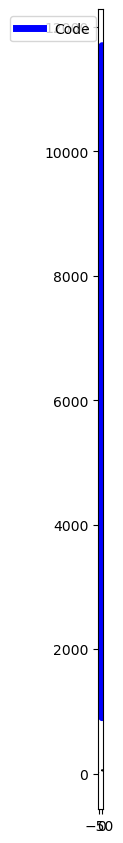

In [95]:
netherlands_shapefile_path = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
world = gpd.read_file(netherlands_shapefile_path)
netherlands = world[world['NAME'] == "Netherlands"]
fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0, 0, 1, 1])
#ax.set_xlim([3,7.5])
#ax.set_ylim([50,54])
netherlands.plot(ax=ax,  color='lightgray', edgecolor='black')

Intercitys.loc[0,'Geometry'] = gdf_railways['geometry'][0]
#print(gdf_railways['geometry'][0])
gdf_railways['geometry']
#display(Intercitys)

GeoIntercitys = gpd.GeoDataFrame(Intercitys)
#display(GeoIntercitys)
GeoIntercitys2 = GeoIntercitys.head(10)
GeoIntercitys2.set_geometry('Geometry')
GeoIntercitys2.crs = "EPSG:4326"  
GeoIntercitys2.plot(ax=ax, color='blue', linewidth=5)
display(GeoIntercitys2)
print(GeoIntercitys2.loc[9, 'Geometry'])

                           Route  Code                      String  \
0  Amsterdam - Rotterdam via HSL  1000  'Asd,Ass,Asdl,Shl,Hfd,Rtd'   

                                            Geometry  
0  LINESTRING (5.06523 52.09896, 5.06148 52.09924...  


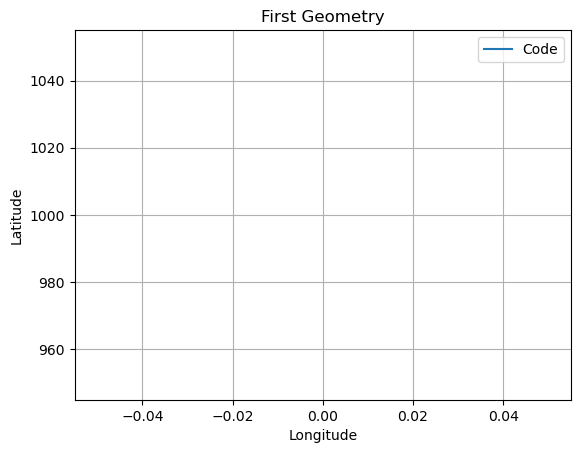

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'gdf' is your GeoDataFrame

# Step 1: Select the first geometry
first_geometry = GeoIntercitys2.iloc[0:1]
print(first_geometry)  # Using slicing to return a GeoDataFrame

# Step 2: Plot the first geometry
ax = first_geometry.plot()

# Step 3: Customize the plot (optional)
plt.title("First Geometry")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()


In [99]:
########### Python 3.2 #############
import urllib.request, json

try:
    url = "https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject?stations=RM,WT,MH"

    hdr ={
    # Request headers
    'Cache-Control': 'no-cache',
    'Ocp-Apim-Subscription-Key': '3b38c6f3a4dc4e4e84c0c4be47c2a180',
    }

    req = urllib.request.Request(url, headers=hdr)

    req.get_method = lambda: 'GET'
    response = urllib.request.urlopen(req)
    print(response.getcode())
    print(response.read())
except Exception as e:
    print(e)
####################################

200
b'{"payload":{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"LineString","coordinates":[[5.99461,51.19296],[5.99561,51.19503],[5.99605,51.19588],[5.99653,51.19671],[5.99718,51.19749],[5.99796,51.19826],[6.0004,51.20049],[6.00164,51.20165],[6.00296,51.20296],[6.00359,51.20377],[6.00385,51.20419],[6.00408,51.20462],[6.00429,51.20509],[6.00443,51.20549],[6.00464,51.20638],[6.00469,51.20681],[6.00471,51.20727],[6.00469,51.20772],[6.00464,51.20818],[6.00454,51.20863],[6.00441,51.20906],[6.00423,51.20954],[6.0038,51.21041],[6.00324,51.21122],[6.00263,51.21191],[6.00219,51.21234],[6.0018,51.21269],[6.00132,51.21306],[6.00086,51.21338],[5.97943,51.22661],[5.97836,51.22718],[5.97772,51.22746],[5.97712,51.22771],[5.97592,51.22812],[5.97456,51.22849],[5.97385,51.22865],[5.9732,51.22877],[5.9718,51.22895],[5.97037,51.22905],[5.96962,51.22906],[5.96895,51.22905],[5.96821,51.22901],[5.96751,51.22896],[5.96678,51.22887],[5.95688,51.22767],[5.95618,51.2276],[5.95547,5

In [101]:
import urllib.request
import json
import geopandas as gpd

try:
    # API request to the GeoJSON endpoint
    url = "https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations=RM,WT,MH"
    
    # API headers (with your subscription key)
    hdr = {
        'Cache-Control': 'no-cache',
        'Ocp-Apim-Subscription-Key': 'fb1ff0d85a594e05bc8664b6ee6f7115',
    }

    # Create the request object
    req = urllib.request.Request(url, headers=hdr)

    # Make the API request
    response = urllib.request.urlopen(req)

    # Check the HTTP response code
    print(f"Response code: {response.getcode()}")

    # Read and decode the response content
    response_content = response.read().decode('utf-8')

    # Load the response content into a JSON object
    geojson_data = json.loads(response_content)

    # Convert the GeoJSON data to a GeoDataFrame
    gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

    # Print the first few rows of the GeoDataFrame to check the data
    print(gdf.head())

except Exception as e:
    print(f"Error: {e}")


Response code: 200
                                            geometry      stations
0  LINESTRING (5.99461 51.19296, 5.99561 51.19503...  [RM, WT, MH]


<Axes: >

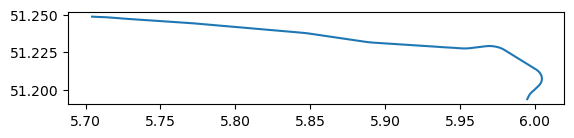

In [102]:
gdf.plot()

In [ ]:
    try:
        # Join station codes into a comma-separated string
        stations_param = ','.join(station_codes)
        url = f"https://gateway.apiportal.ns.nl/Spoorkaart-API/api/v1/traject.geojson?stations={stations_param}"

        # API request headers
        headers = {
            'Cache-Control': 'no-cache',
            'Ocp-Apim-Subscription-Key': '3b38c6f3a4dc4e4e84c0c4be47c2a180',  # Replace with your API key
        }

        # Make the API request
        req = urllib.request.Request(url, headers=headers)
        response = urllib.request.urlopen(req)
        response_content = response.read().decode('utf-8')

        # Load the response content into JSON
        geojson_data = json.loads(response_content)

        # Convert the GeoJSON data to a GeoDataFrame
        gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

        return gdf

    except Exception as e:
        print(f"Error fetching data: {e}")
        return None